These tweets are collected using Twitter API and a Python script. A query for this high-frequency hashtag (#covid19) is run on a daily basis for a certain time period, to collect a larger number of tweets samples.

**Content**

The tweets have #covid19 hashtag. Collection started on 25/7/2020, with an initial 17k batch and will continue on a daily basis.

Inspiration

You can use this data to dive into the subjects that use this hashtag, look to the geographical distribution, evaluate sentiments, looks to trends.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving covid_tweets.csv to covid_tweets.csv


In [ ]:
import io
import pandas as pd
data = pd.read_csv(io.BytesIO(uploaded['covid_tweets.csv']))

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,8,13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
data.shape

(179113, 14)

In [ ]:
data.head()

,Unnamed: 0,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,5/26/2017 5:46,624.0,950.0,18775.0,False,7/25/2020 12:27,If I smelled the scent of hand sanitizers toda...,['COVID19'],Twitter for iPhone,False
1,1,Tom Basile 🇺🇸,"new york, ny","Husband, Father, Columnist & Commentator. Auth...",4/16/2009 20:06,2253.0,1677.0,24.0,True,7/25/2020 12:27,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,['COVID19'],Twitter for Android,False
2,2,Time4fisticuffs,"pewee valley, ky",#Christian #Catholic #Conservative #Reagan #Re...,2/28/2009 18:57,9275.0,9525.0,7254.0,False,7/25/2020 12:27,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,3,ethel mertz,stuck in the middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,3/7/2019 1:45,197.0,987.0,1488.0,False,7/25/2020 12:27,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,4,DIPR-J&K,jammu and kashmir,🖊️Official Twitter handle of Department of Inf...,2/12/2017 6:45,101009.0,168.0,101.0,False,7/25/2020 12:27,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179113 entries, 0 to 179112
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        179113 non-null  object 
 1   user_name         179111 non-null  object 
 2   user_location     179109 non-null  object 
 3   user_description  168825 non-null  object 
 4   user_created      179108 non-null  object 
 5   user_followers    179108 non-null  float64
 6   user_friends      179108 non-null  float64
 7   user_favourites   179108 non-null  float64
 8   user_verified     179108 non-null  object 
 9   date              179108 non-null  object 
 10  text              179108 non-null  object 
 11  hashtags          179105 non-null  object 
 12  source            179105 non-null  object 
 13  is_retweet        179105 non-null  object 
dtypes: float64(3), object(11)
memory usage: 19.1+ MB


we see the user_location has null values, lets replace the null with 'unknown' user location

In [ ]:
data['user_location'].fillna('unknown',inplace=True)

In [ ]:
data['user_location'].value_counts()

unknown                          36780
India                            14479
Australia                         2924
United States                     2709
Canada                            2665
                                 ...  
crazy place we call life             1
sunny cheshire :-/ & london          1
malay world of southeast asia        1
st louis, missouri                   1
sehatpur                             1
Name: user_location, Length: 21490, dtype: int64

the user_location has multiple values for a country like New Delhi, India and Mumbai, India, lets merge all these locations country wise so we have country level information.

In [ ]:
!pip install pycountry

     |████████████████████████████████| 10.1MB 4.6MB/s 
  Created wheel for pycountry: filename=pycountry-20.7.3-py2.py3-none-any.whl size=10746865 sha256=925105af24c939bbd21b17929bc67df82432259fef6f8a8de589401625a83c5a
  Stored in directory: /root/.cache/pip/wheels/33/4e/a6/be297e6b83567e537bed9df4a93f8590ec01c1acfbcd405348
Successfully built pycountry


In [ ]:
import pycountry
print(len(pycountry.countries))
print(list(pycountry.countries)[0])
country = list(pycountry.countries)

249
Country(alpha_2='AW', alpha_3='ABW', name='Aruba', numeric='533')


In [ ]:
def correct_country(x):
  for l in country:
    if str(l.name).lower() in x or str(l.alpha_2).lower in x.split() or str(l.alpha_3).lower in x.split():
      return str(l.name)
  return x

In [ ]:
data['user_location'] = data['user_location'].apply(lambda x: correct_country(x.lower()))

In [ ]:
data['user_location'].value_counts().head(10)

unknown           36780
India             14479
Australia          2924
United States      2709
Canada             2665
Niger              2360
South Africa       2235
United Kingdom     2100
worldwide          1738
Ireland            1663
Name: user_location, dtype: int64

the user location is now better for country wise analysis of tweets.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179113 entries, 0 to 179112
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        179113 non-null  object 
 1   user_name         179111 non-null  object 
 2   user_location     179113 non-null  object 
 3   user_description  168825 non-null  object 
 4   user_created      179108 non-null  object 
 5   user_followers    179108 non-null  float64
 6   user_friends      179108 non-null  float64
 7   user_favourites   179108 non-null  float64
 8   user_verified     179108 non-null  object 
 9   date              179108 non-null  object 
 10  text              179108 non-null  object 
 11  hashtags          179105 non-null  object 
 12  source            179105 non-null  object 
 13  is_retweet        179105 non-null  object 
dtypes: float64(3), object(11)
memory usage: 19.1+ MB


since it is mentioned that the tweets having hashtags #covid19 are collected, it would be valid to fill the null hashtags with #covid19


In [ ]:
data['hashtags'].fillna('[Covid19]',inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179113 entries, 0 to 179112
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        179113 non-null  object 
 1   user_name         179111 non-null  object 
 2   user_location     179113 non-null  object 
 3   user_description  168825 non-null  object 
 4   user_created      179108 non-null  object 
 5   user_followers    179108 non-null  float64
 6   user_friends      179108 non-null  float64
 7   user_favourites   179108 non-null  float64
 8   user_verified     179108 non-null  object 
 9   date              179108 non-null  object 
 10  text              179108 non-null  object 
 11  hashtags          179113 non-null  object 
 12  source            179105 non-null  object 
 13  is_retweet        179105 non-null  object 
dtypes: float64(3), object(11)
memory usage: 19.1+ MB


In [ ]:
data['source'].value_counts()

Twitter Web App               56891
Twitter for Android           40177
Twitter for iPhone            35471
TweetDeck                      8543
Hootsuite Inc.                 7321
                              ...  
Dynamics 365 for Marketing        1
audioBoom                         1
Total Travel TAG                  1
Tweetings for Android             1
GovernmentCyberWeb                1
Name: source, Length: 611, dtype: int64

In [ ]:
data['source'].fillna('unknown',inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179113 entries, 0 to 179112
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        179113 non-null  object 
 1   user_name         179111 non-null  object 
 2   user_location     179113 non-null  object 
 3   user_description  168825 non-null  object 
 4   user_created      179108 non-null  object 
 5   user_followers    179108 non-null  float64
 6   user_friends      179108 non-null  float64
 7   user_favourites   179108 non-null  float64
 8   user_verified     179108 non-null  object 
 9   date              179108 non-null  object 
 10  text              179108 non-null  object 
 11  hashtags          179113 non-null  object 
 12  source            179113 non-null  object 
 13  is_retweet        179105 non-null  object 
dtypes: float64(3), object(11)
memory usage: 19.1+ MB


In [ ]:
def country_flag(x):
  for l in country:
    if str(l.name).lower() in x or str(l.alpha_2).lower in x.split() or str(l.alpha_3).lower in x.split():
      return str(l.name)
  return " "

In [ ]:
data['country_flag'] = data['user_location'].apply(lambda x: country_flag(x.lower()))

In [ ]:
data['country_flag'].nunique()

179

In [ ]:
data['hashtags'].head(5)

0                          ['COVID19']
1                          ['COVID19']
2                          ['COVID19']
3                          ['COVID19']
4    ['CoronaVirusUpdates', 'COVID19']
Name: hashtags, dtype: object

In [ ]:
import re
def remove_tag(string):
    text=re.sub('<.*?>','',string)
    return text
def remove_mention(text):
    line=re.sub(r'@\w+','',text)
    return line
def remove_hash(text):
    line=re.sub(r'#\w+','',text)
    return line

def remove_newline(string):
    text=re.sub('\n','',string)
    return text
def remove_url(string): 
    text = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+','',string)
    return text
def remove_number(text):
    line=re.sub(r'[0-9]+','',text)
    return line
def remove_punct(text):
    line = re.sub(r'[!"\$%&\'()*+,\-.\/:;=#@?\[\\\]^_`{|}~]*','',text)
    #string="".join(line)
    return line
def text_strip(string):
    line=re.sub('\s{2,}', ' ', string.strip())
    return line
def remove_thi_amp_ha_words(string):
    line=re.sub(r'\bamp\b|\bthi\b|\bha\b',' ',string)
    return line

In [ ]:
data['refine_hashtag']=data['hashtags'].str.lower()
data['refine_hashtag']=data['refine_hashtag'].apply(lambda x:remove_punct(str(x)))

In [ ]:
data['refine_hashtag'].head(5)

0                       covid19
1                       covid19
2                       covid19
3                       covid19
4    coronavirusupdates covid19
Name: refine_hashtag, dtype: object

Text(0.5, 1.0, 'Most Used Words in Comments')

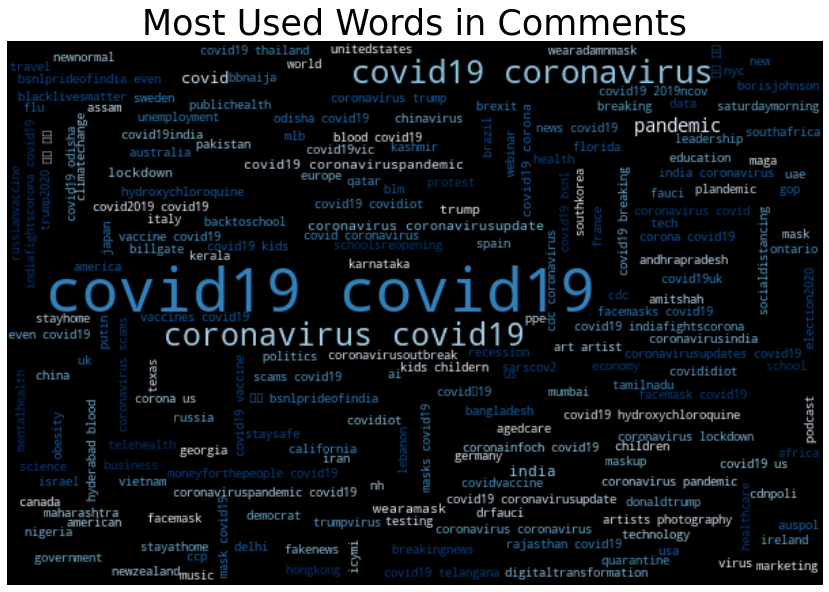

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

fig, (ax2) = plt.subplots(1,1,figsize=[17, 10])
wordcloud2 = WordCloud(background_color='black',colormap="Blues", 
                        width=600,height=400).generate(" ".join(data['refine_hashtag']))

ax2.imshow(wordcloud2,interpolation='bilinear')
ax2.axis('off')
ax2.set_title('Most Used Words in Comments',fontsize=35)

In [ ]:
data['refine_description']=data['user_description'].str.lower()
data['refine_description']=data['refine_description'].apply(lambda x:remove_punct(str(x)))

In [ ]:
data['refine_description'].head()

0    wednesday addams as a disney princess keepin i...
1    husband father columnist  commentator author o...
2    christian catholic conservative reagan republi...
3           browns indians clevelandproud  cavs resist
4    🖊️official twitter handle of department of inf...
Name: refine_description, dtype: object

Text(0.5, 1.0, 'Most Used Words in Comments')

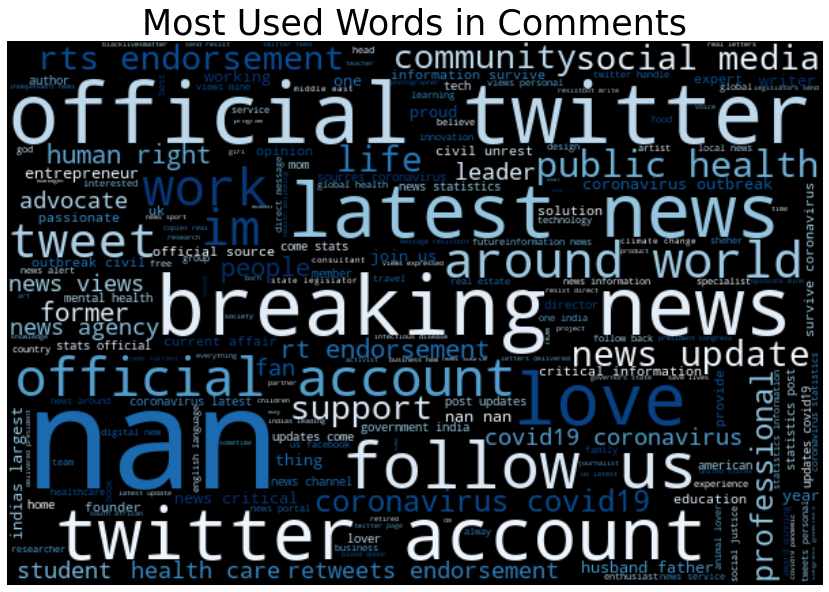

In [ ]:
fig, (ax2) = plt.subplots(1,1,figsize=[17, 10])
wordcloud2 = WordCloud(background_color='black',colormap="Blues", 
                        width=600,height=400).generate(" ".join(data['refine_description']))

ax2.imshow(wordcloud2,interpolation='bilinear')
ax2.axis('off')
ax2.set_title('Most Used Words in Comments',fontsize=35)

In [ ]:
data['refine_text']=data['text'].str.lower()
data['refine_text']=data['refine_text'].apply(lambda x:remove_tag(str(x)))
data['refine_text']=data['refine_text'].apply(lambda x:remove_mention(str(x)))
data['refine_text']=data['refine_text'].apply(lambda x:remove_hash(str(x)))
data['refine_text']=data['refine_text'].apply(lambda x:remove_newline(x))
data['refine_text']=data['refine_text'].apply(lambda x:remove_url(x))
data['refine_text']=data['refine_text'].apply(lambda x:remove_number(x))
data['refine_text']=data['refine_text'].apply(lambda x:remove_punct(x))
data['refine_text']=data['refine_text'].apply(lambda x:remove_thi_amp_ha_words(x))
data['refine_text']=data['refine_text'].apply(lambda x:text_strip(x))

data['text_length']=data['refine_text'].str.split().map(lambda x: len(x))

In [ ]:
data.head()

,Unnamed: 0,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,country_flag,only_date,refine_hashtag,refine_description,refine_text,text_length
0,0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,5/26/2017 5:46,624.0,950.0,18775.0,False,7/25/2020 12:27,If I smelled the scent of hand sanitizers toda...,['COVID19'],Twitter for iPhone,False,,2020-07-25,covid19,wednesday addams as a disney princess keepin i...,if i smelled the scent of hand sanitizers toda...,22
1,1,Tom Basile 🇺🇸,"new york, ny","Husband, Father, Columnist & Commentator. Auth...",4/16/2009 20:06,2253.0,1677.0,24.0,True,7/25/2020 12:27,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,['COVID19'],Twitter for Android,False,,2020-07-25,covid19,husband father columnist commentator author o...,hey and wouldnt it have made more sense to hav...,18
2,2,Time4fisticuffs,"pewee valley, ky",#Christian #Catholic #Conservative #Reagan #Re...,2/28/2009 18:57,9275.0,9525.0,7254.0,False,7/25/2020 12:27,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False,,2020-07-25,covid19,christian catholic conservative reagan republi...,trump never once claimed was a hoax we all cla...,14
3,3,ethel mertz,stuck in the middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,3/7/2019 1:45,197.0,987.0,1488.0,False,7/25/2020 12:27,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False,,2020-07-25,covid19,browns indians clevelandproud cavs resist,the one gift has give me is an appreciation fo...,18
4,4,DIPR-J&K,jammu and kashmir,🖊️Official Twitter handle of Department of Inf...,2/12/2017 6:45,101009.0,168.0,101.0,False,7/25/2020 12:27,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False,,2020-07-25,coronavirusupdates covid19,🖊️official twitter handle of department of inf...,july media bulletin on novel …,6


In [ ]:
data.to_csv('covid_tweets.csv') 

In [ ]:
files.download('covid_tweets.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>